In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%fs
ls /FileStore/tables

path,name,size,modificationTime
dbfs:/FileStore/tables/Rossmann_DE.csv,Rossmann_DE.csv,16640,1747167784000
dbfs:/FileStore/tables/Rossmann_DE_BE-1.csv,Rossmann_DE_BE-1.csv,16562,1747168916000
dbfs:/FileStore/tables/Rossmann_DE_BE.csv,Rossmann_DE_BE.csv,16562,1747167784000
dbfs:/FileStore/tables/Rossmann_DE_BW-1.csv,Rossmann_DE_BW-1.csv,16518,1747168916000
dbfs:/FileStore/tables/Rossmann_DE_BW.csv,Rossmann_DE_BW.csv,16518,1747167787000
dbfs:/FileStore/tables/Rossmann_DE_BY-1.csv,Rossmann_DE_BY-1.csv,16588,1747168914000
dbfs:/FileStore/tables/Rossmann_DE_BY.csv,Rossmann_DE_BY.csv,16588,1747167787000
dbfs:/FileStore/tables/Rossmann_DE_HB-1.csv,Rossmann_DE_HB-1.csv,16472,1747168914000
dbfs:/FileStore/tables/Rossmann_DE_HB.csv,Rossmann_DE_HB.csv,16472,1747167787000
dbfs:/FileStore/tables/Rossmann_DE_HE-1.csv,Rossmann_DE_HE-1.csv,16587,1747168914000


# Data

In [0]:
test_df = spark.read.option("Header", True).option("InferSchema", True).csv('/FileStore/tables/test-3.csv')
display(test_df.head(1))
test_df.printSchema()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
750000,male,45,177.0,81.0,7.0,87.0,39.8


root
 |-- id: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Duration: double (nullable = true)
 |-- Heart_Rate: double (nullable = true)
 |-- Body_Temp: double (nullable = true)



In [0]:
train_df = spark.read.option("Header", True).option("InferSchema", True).csv('/FileStore/tables/train-2.csv')
display(train_df.head(10))
train_df.printSchema()

id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


root
 |-- id: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Duration: double (nullable = true)
 |-- Heart_Rate: double (nullable = true)
 |-- Body_Temp: double (nullable = true)
 |-- Calories: double (nullable = true)



In [0]:
display(train_df.describe())

summary,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
mean,374999.5,null,41.420404,174.69768546666666,75.145668,15.421014666666666,95.48399465764,40.03625318080532,88.28278133333333
stddev,216506.49528362884,null,15.175048847354477,12.824495661033007,13.982703512617753,8.354095425099294,9.449845358526979,0.7798745572755807,62.39534902771437
min,0,female,20,126.0,36.0,1.0,67.0,37.1,1.0
max,749999,male,79,222.0,132.0,30.0,128.0,41.5,314.0



Age statistics:
  Mean: 41.42
  Std Dev: 15.18
  Min: 20
  Max: 79
  Skewness: 0.44
  Missing: 0


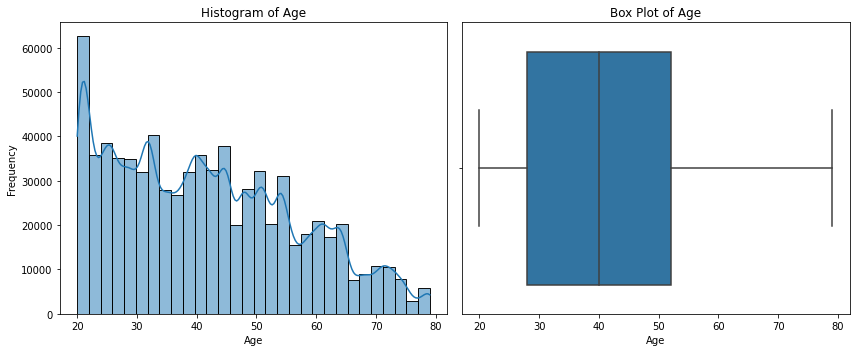


Height statistics:
  Mean: 174.70
  Std Dev: 12.82
  Min: 126.0
  Max: 222.0
  Skewness: 0.05
  Missing: 0


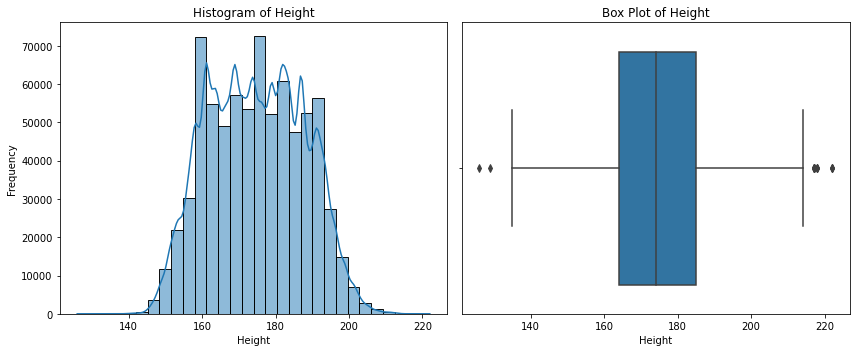


Weight statistics:
  Mean: 75.15
  Std Dev: 13.98
  Min: 36.0
  Max: 132.0
  Skewness: 0.21
  Missing: 0


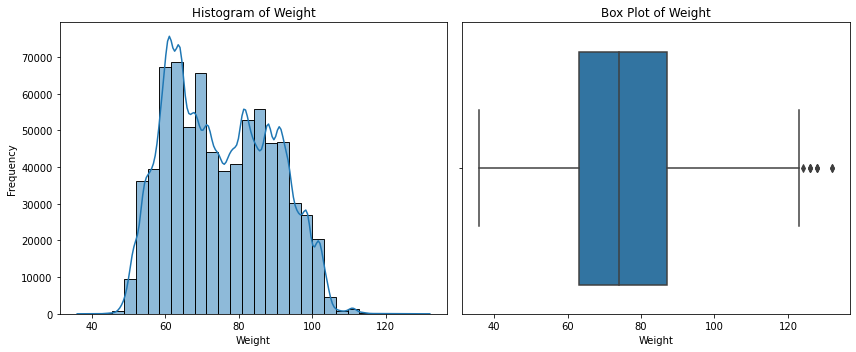


Duration statistics:
  Mean: 15.42
  Std Dev: 8.35
  Min: 1.0
  Max: 30.0
  Skewness: 0.03
  Missing: 0


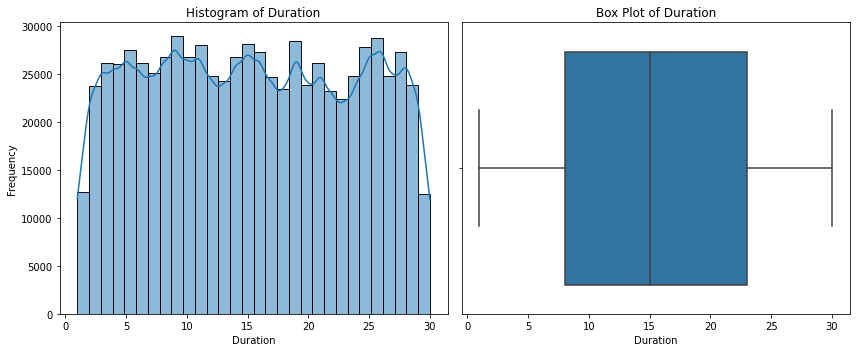


Heart_Rate statistics:
  Mean: 95.48
  Std Dev: 9.45
  Min: 67.0
  Max: 128.0
  Skewness: -0.01
  Missing: 0


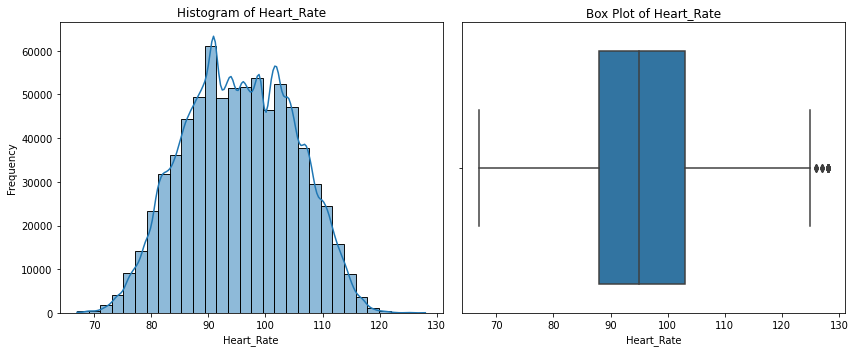


Body_Temp statistics:
  Mean: 40.04
  Std Dev: 0.78
  Min: 37.1
  Max: 41.5
  Skewness: -1.02
  Missing: 0


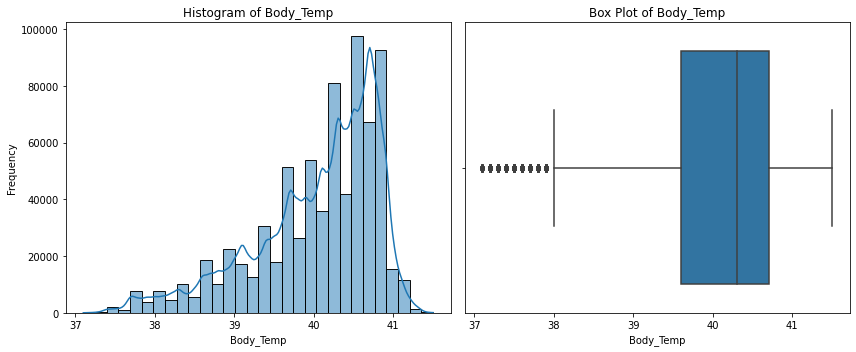


Calories statistics:
  Mean: 88.28
  Std Dev: 62.40
  Min: 1.0
  Max: 314.0
  Skewness: 0.54
  Missing: 0


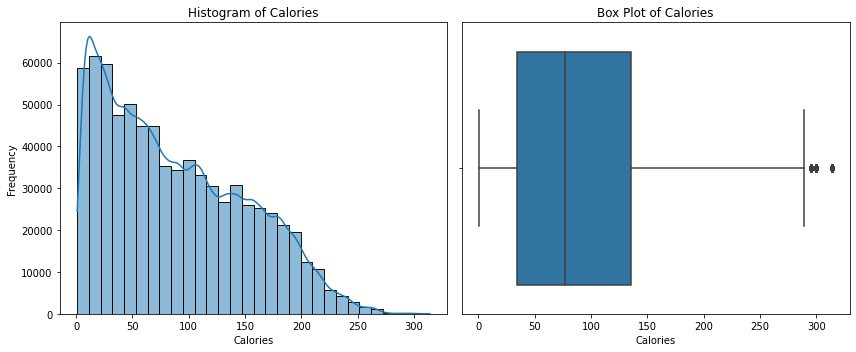

In [0]:
numerical_features = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]

for feature in numerical_features:
    # Estadísticas en PySpark
    stats = train_df.select(
        F.mean(feature).alias("mean"),
        F.stddev(feature).alias("stddev"),
        F.min(feature).alias("min"),
        F.max(feature).alias("max"),
        F.skewness(feature).alias("skew"),
        F.count(F.when(F.col(feature).isNull() | F.isnan(feature), feature)).alias("missing")
    ).collect()[0]

    print(f"\n{feature} statistics:")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Std Dev: {stats['stddev']:.2f}")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}")
    print(f"  Skewness: {stats['skew']:.2f}")
    print(f"  Missing: {stats['missing']}")

    # Visualización: convertir a Pandas
    pandas_df = train_df.select(feature).dropna().toPandas()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(pandas_df[feature], kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=pandas_df[feature])
    plt.title(f"Box Plot of {feature}")

    plt.tight_layout()
    plt.show()

Sex,count
female,375721
male,374279


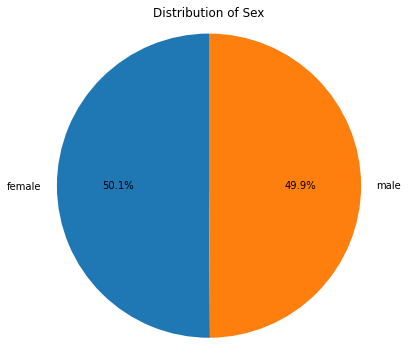

In [0]:
sex_counts_df = train_df.groupBy("Sex").count()

display(sex_counts_df)

sex_counts_pd = sex_counts_df.toPandas().set_index("Sex")["count"]


plt.figure(figsize=(6, 6))
plt.pie(sex_counts_pd, labels=sex_counts_pd.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sex")
plt.axis("equal")
plt.show()

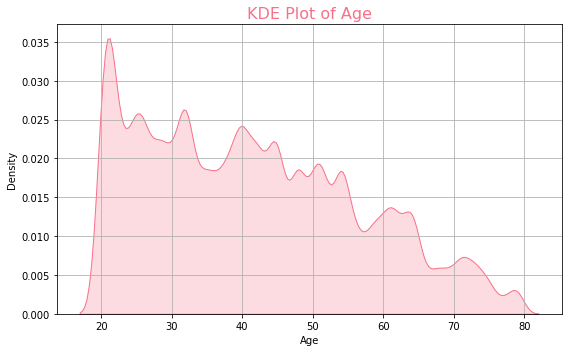

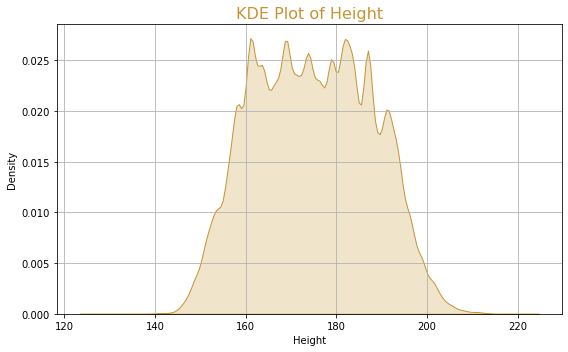

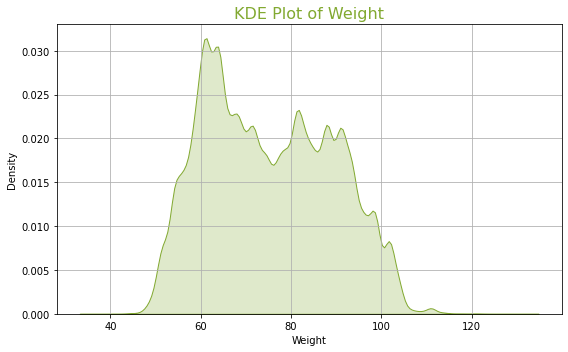

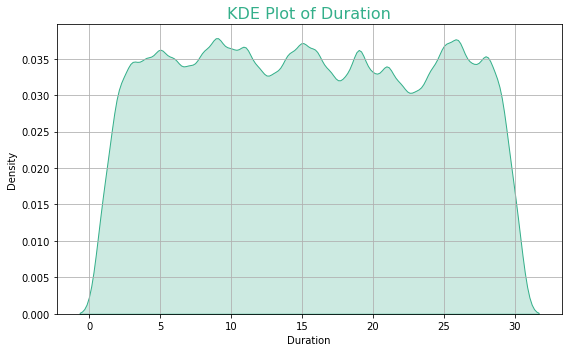

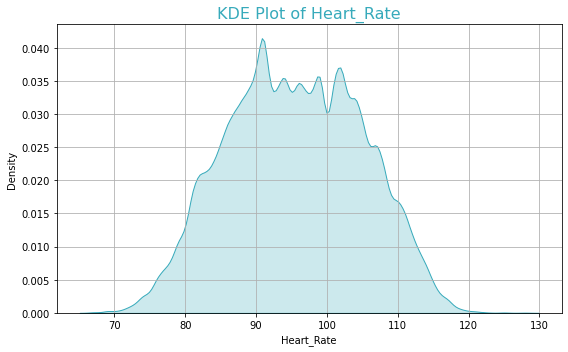

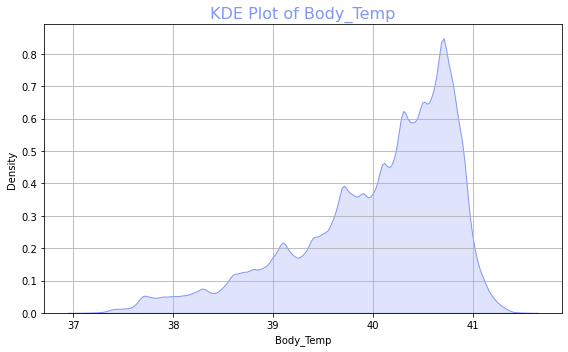

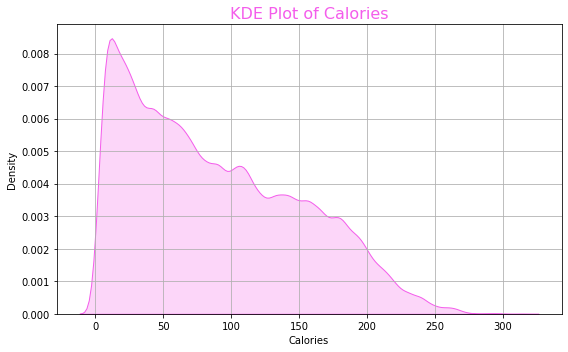

In [0]:
numeric_pd = train_df.select(*numerical_features).toPandas()

colors = sns.color_palette('husl', len(numerical_features))

for col, color in zip(numerical_features, colors):
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=numeric_pd, x=col, fill=True, color=color)
    plt.title(f'KDE Plot of {col}', fontsize=16, color=color)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

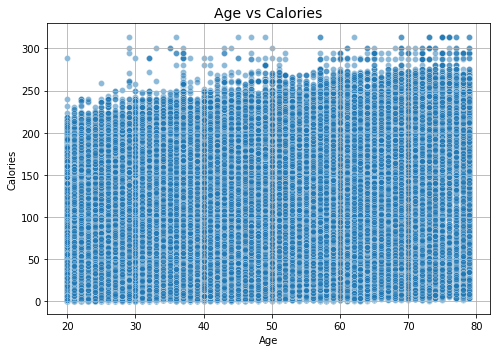

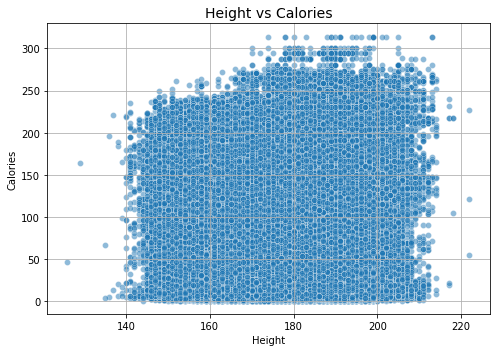

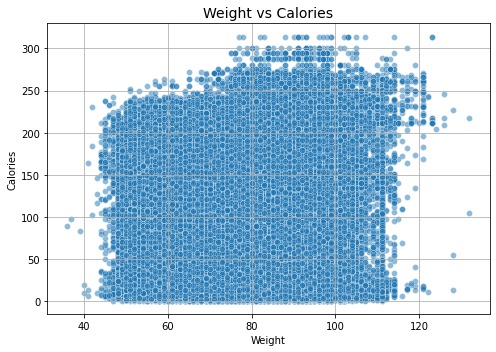

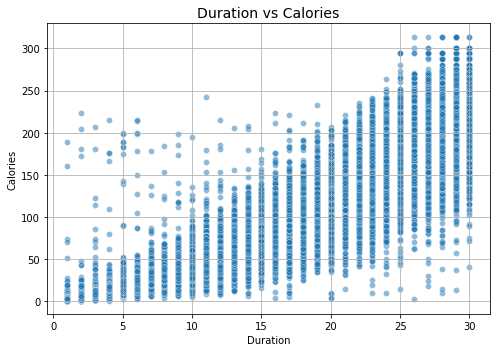

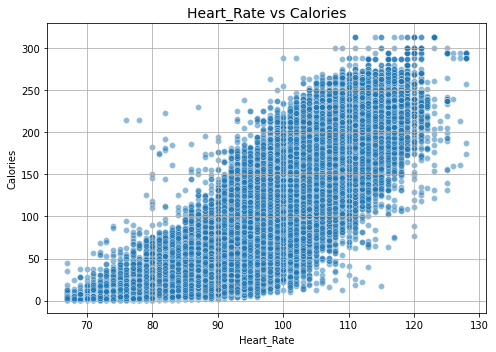

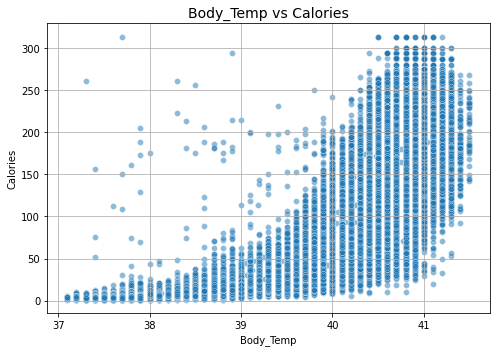

In [0]:
features = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]

for feature in features:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=numeric_pd, x=feature, y="Calories", alpha=0.5)
    plt.title(f"{feature} vs Calories", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Calories")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correlación con 'Calories':

Calories      1.000000
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Age           0.145683
Weight        0.015863
Height       -0.004026
Name: Calories, dtype: float64


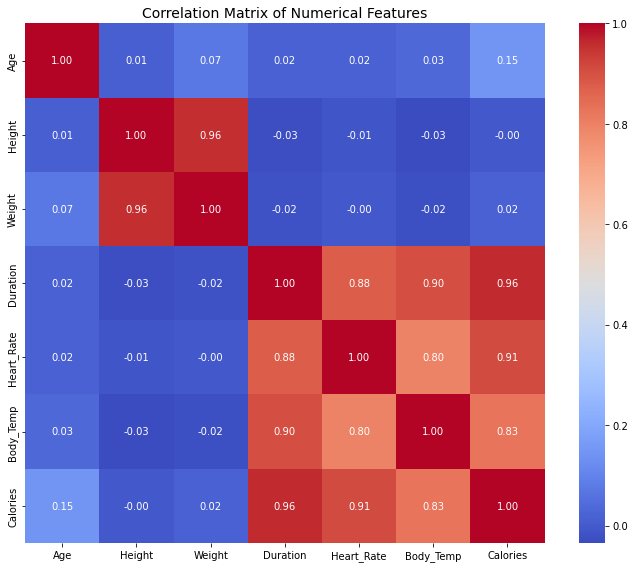

In [0]:
correlation_matrix = numeric_pd.corr()

calories_corr = correlation_matrix["Calories"].sort_values(ascending=False)
print("\nCorrelación con 'Calories':\n")
print(calories_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()